In [1]:
# !pip install mtcnn
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\users\lenovo\anaconda3\lib\site-packages
Requires: keras, opencv-python
Required-by: 


In [2]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [3]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)
    print('\n')
    

{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}


{'box': [185, 68, 91, 118], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}




In [38]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

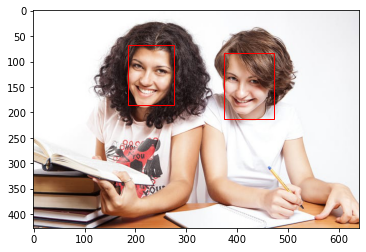

In [34]:
draw_image_with_boxes(filename,result_list)

In [39]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

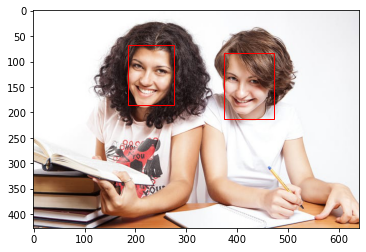

In [40]:
draw_image_with_boxes(filename,result_list)

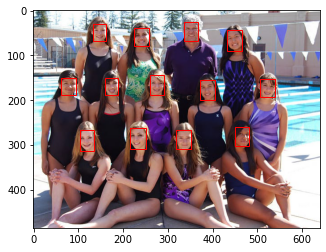

In [41]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [43]:
# draw an image with detected objects
def draw_image_with_boxes_features(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='green')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

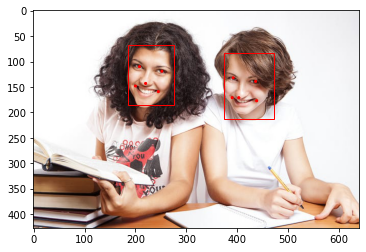

In [44]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes_features(filename, faces)

In [10]:
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

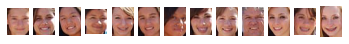

In [11]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

### Assignment 1 - Detect faces from live images taken from webcam.

In [2]:
import numpy as np
import cv2

In [3]:

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height
while True:
    ret, img = cap.read()
#     img = cv2.flip(img, 1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.1,
        minNeighbors=4,     
        minSize=(20, 20)
    )
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]  
    cv2.imshow('video',img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()

In [51]:
print(faces)

[[162 166 226 226]]


### Assignment 2: Once you're done with images, then take short live video sequence and detect faces.

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

In [6]:
# To capture video from existing video.   
cap = cv2.VideoCapture('Kavya.mp4')  
cnt = 0
while(cnt<188):  
    # Read the frame  
    ret, img = cap.read()  
  
    # Convert to grayscale  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
  
    # Detect the faces  
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)  
  
    # Draw the rectangle around each face  
    for (x, y, w, h) in faces:  
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  
  
    # Display  
    cv2.imshow('Video', img)  
  
    # Stop if q key is pressed  
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break 
    cnt = cnt + 1
          
# Release the VideoCapture object  
cap.release()
cv2.destroyAllWindows()

In [11]:
cap = cv2.VideoCapture("Kavya.mp4")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

188


### Assignment 3: Detect faces in mask wearing images.

In [19]:
import numpy as np
import cv2
import random

In [20]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
mouth_cascade = cv2.CascadeClassifier('mouth.xml')

In [21]:
bw_threshold = 80

font = cv2.FONT_HERSHEY_SIMPLEX
org = (30, 30)
weared_mask_font_color = (0, 255, 0)
not_weared_mask_font_color = (0, 0, 255)
noface = (255, 255, 255)
thickness = 2
font_scale = 1
weared_mask = "Person is Wearing a Mask"
not_weared_mask = "Person is not wearing a mask"

In [22]:
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
#     img = cv2.flip(img,1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, black_and_white) = cv2.threshold(gray, bw_threshold, 255, cv2.THRESH_BINARY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    faces_bw = face_cascade.detectMultiScale(black_and_white, 1.1, 4)
    if(len(faces) == 0 and len(faces_bw) == 0):
        cv2.putText(img, "No face found...", org, font, font_scale, noface, thickness, cv2.LINE_AA)
    elif(len(faces) == 0 and len(faces_bw) == 1):
        cv2.putText(img, weared_mask, org, font, font_scale, weared_mask_font_color, thickness, cv2.LINE_AA)
    else:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]
            mouth_rects = mouth_cascade.detectMultiScale(gray, 1.5, 5)
        if(len(mouth_rects) == 0):
            cv2.putText(img, weared_mask, org, font, font_scale, weared_mask_font_color, thickness, cv2.LINE_AA)
        else:
            for (mx, my, mw, mh) in mouth_rects:
                if(y < my < y + h):
                    cv2.putText(img, not_weared_mask, org, font, font_scale, not_weared_mask_font_color, thickness, cv2.LINE_AA)
                    break
    cv2.imshow('Mask Detection', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()